In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], 
                  columns=['SepalLengthCm', 'SepalWidthCm', 
                           'PetalLengthCm', 'PetalWidthCm', 'Species'])

In [3]:
species_names = iris['target_names']
df['Species'] = df['Species'].map(dict(enumerate(species_names)))

In [4]:
np.random.seed(42)
mask = np.random.rand(*df.shape) < 0.1
df[mask] = np.nan


In [5]:
df = df.drop(columns=['SepalWidthCm'])

In [6]:
X = df.drop(columns=['Species'])
y = df['Species']

In [7]:
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), 
                         columns=X.columns)


In [9]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [10]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), 
                        columns=X_imputed.columns)

In [11]:
plt.figure(figsize=(15, 5), dpi=100)

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0, 0.5, 'Frequency')

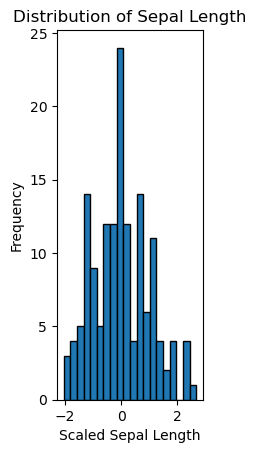

In [12]:
plt.subplot(1, 3, 1)
plt.hist(X_scaled['SepalLengthCm'], bins=20, edgecolor='black')
plt.title('Distribution of Sepal Length')
plt.xlabel('Scaled Sepal Length')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Scatter Plot: Sepal vs Petal Length')

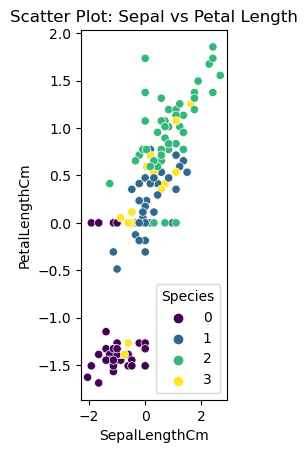

In [13]:
plt.subplot(1, 3, 2)
scatter_data = pd.concat([X_scaled, pd.Series(y_encoded, name='Species')], axis=1)
sns.scatterplot(data=scatter_data, 
                x='SepalLengthCm', 
                y='PetalLengthCm', 
                hue='Species', 
                palette='viridis')
plt.title('Scatter Plot: Sepal vs Petal Length')

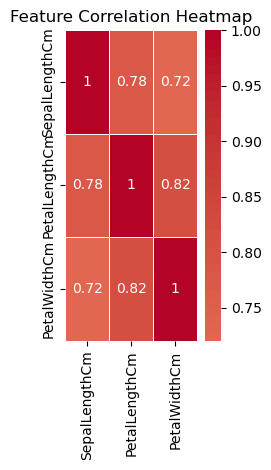

In [14]:
plt.subplot(1, 3, 3)
correlation_matrix = X_scaled.corr()
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()

In [15]:
print("Original Dataset Shape:", df.shape)
print("\nMissing Values Before Imputation:")
print(df.isnull().sum())
print("\nMissing Values After Imputation:")
print(X_imputed.isnull().sum())
print("\nFeature Scaling Summary:")
print(X_scaled.describe())

Original Dataset Shape: (150, 4)

Missing Values Before Imputation:
SepalLengthCm    15
PetalLengthCm    19
PetalWidthCm     15
Species          19
dtype: int64

Missing Values After Imputation:
SepalLengthCm    0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

Feature Scaling Summary:
       SepalLengthCm  PetalLengthCm  PetalWidthCm
count   1.500000e+02   1.500000e+02  1.500000e+02
mean    0.000000e+00  -1.184238e-15 -8.052818e-16
std     1.003350e+00   1.003350e+00  1.003350e+00
min    -2.055406e+00  -1.689093e+00 -1.583750e+00
25%    -8.718428e-01  -1.313497e+00 -1.159531e+00
50%     2.336034e-15   1.438161e-01  1.131250e-01
75%     6.733646e-01   7.748176e-01  8.201564e-01
max     2.678846e+00   1.856535e+00  1.810000e+00


In [16]:
print("\nUnique Species:", y.unique())
print("Encoded Species Labels:", le.classes_)


Unique Species: ['setosa' nan 'versicolor' 'virginica']
Encoded Species Labels: ['setosa' 'versicolor' 'virginica' nan]


In [17]:
plt.show(block=True)